In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df1 = pd.read_csv('G:/Education/Machine Learning/Time Series ( ALL TECHNIQUES )/UDEMY_TSA_FINAL/Data/airline_passengers.csv', index_col = 'Month', parse_dates=True)
df1.index.freq = 'MS'

df2 = pd.read_csv('G:/Education/Machine Learning/Time Series ( ALL TECHNIQUES )/UDEMY_TSA_FINAL/Data/DailyTotalFemaleBirths.csv', index_col = 'Date', parse_dates=True)
df2.index.freq = 'D'

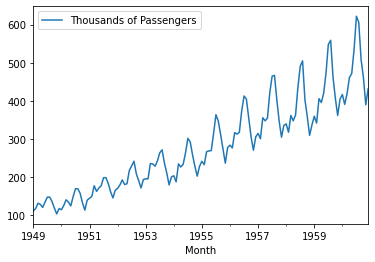

In [3]:
df1.plot() 

* The above plot is non-stationary as it have trend and seasonality

# Implementing Augmented Dickey Fuller Test

In [4]:
from statsmodels.tsa.stattools import adfuller

In [5]:
adfuller(df1['Thousands of Passengers'])

(0.8153688792060456,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [6]:
help(adfuller) # the info that printed in the above cell #

Help on function adfuller in module statsmodels.tsa.stattools:

adfuller(x, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)
    Augmented Dickey-Fuller unit root test.
    
    The Augmented Dickey-Fuller test can be used to test for a unit root in a
    univariate process in the presence of serial correlation.
    
    Parameters
    ----------
    x : array_like, 1d
        The data series to test.
    maxlag : int
        Maximum lag which is included in test, default 12*(nobs/100)^{1/4}.
    regression : {'c','ct','ctt','nc'}
        Constant and trend order to include in regression.
    
        * 'c' : constant only (default).
        * 'ct' : constant and trend.
        * 'ctt' : constant, and linear and quadratic trend.
        * 'nc' : no constant, no trend.
    
    autolag : {'AIC', 'BIC', 't-stat', None}
        Method to use when automatically determining the lag.
    
        * if None, then maxlag lags are used.
        * if 'AIC' (default) or 

In [7]:
dftest = adfuller(df1['Thousands of Passengers'])
dfout = pd.Series(dftest[0:4], index = ['ADF Test Static', 'P value', '#lags used', '#observations'])

In [8]:
print('dftest: ', dftest)
print()
print('dfout: ', dfout)

dftest:  (0.8153688792060456, 0.991880243437641, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)

dfout:  ADF Test Static      0.815369
P value              0.991880
#lags used          13.000000
#observations      130.000000
dtype: float64


In [9]:
for key, val in dftest[4].items():
    dfout[f'critical value({key})'] = val

In [10]:
dfout

ADF Test Static          0.815369
P value                  0.991880
#lags used              13.000000
#observations          130.000000
critical value(1%)      -3.481682
critical value(5%)      -2.884042
critical value(10%)     -2.578770
dtype: float64

# Implementing Granger Causality Test

* The test is implemented inorder to find whether the columns in the data provided in the data are useful in predicting other timeseries

In [11]:
df3 = pd.read_csv('G:/Education/Machine Learning/Time Series ( ALL TECHNIQUES )/UDEMY_TSA_FINAL/Data/samples.csv', index_col = 0, parse_dates=True)
df3.index.freq = 'MS'

In [12]:
df3.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


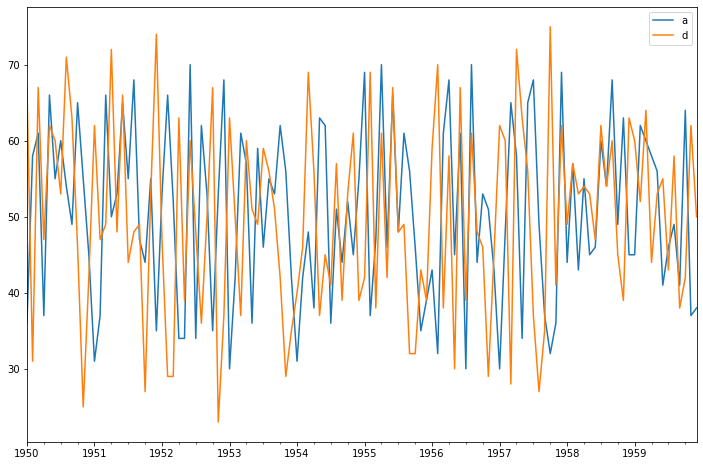

In [13]:
df3[['a', 'd']].plot(figsize = (12,8))

* Can't say whether the above plot do have a causality or not so we shift data to few time series. Like a trail & Error method.

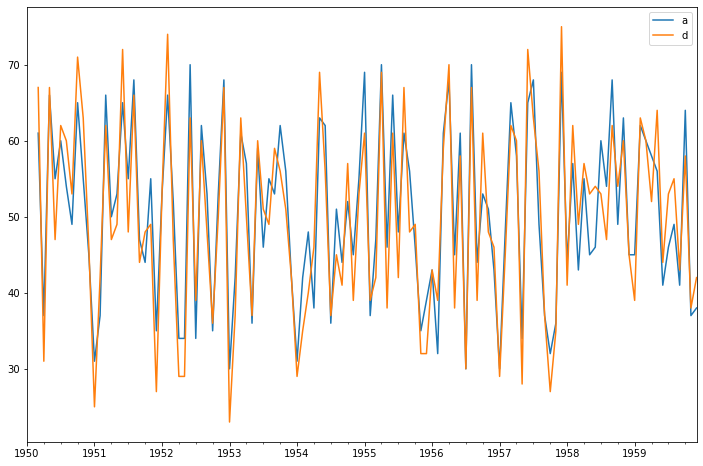

In [15]:
df3['a'].iloc[2:].plot(figsize = (12,8), legend = True)
df3['d'].shift(2).plot(legend = True)

* There is a causality to some  extent b/w two data's
* But we can't be doing trail and error process for huge data.
* So, "Granger Causality Test" will come in to action.
* The "Granger Causality Test" will consider 'maxlag' as the parameter of to how many lags we need to verify the causality and inform the link b/w selected columns. The parameter varies from 1 day to 1year to 2years depending on the huge data.
* The point where the null hypothesis value starts returning the least value i.e; 0(zero) then the number of lags will be the point where the p value returns zero.
* The causality test is done in b/w the different columns of the dataset to find the relation. 

In [16]:
from statsmodels.tsa.stattools import grangercausalitytests

In [18]:
grangercausalitytests(df3[['a', 'd']], maxlag = 3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.7492  , p=0.1860  , df=1
likelihood ratio test: chi2=1.7365  , p=0.1876  , df=1
parameter F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=597.3806, p=0.0000  , df=2
likelihood ratio test: chi2=212.6514, p=0.0000  , df=2
parameter F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=602.2669, p=0.0000  , df=3
likelihood ratio test: chi2=212.4789, p=0.0000  , df=3
parameter F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3
